In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datadata import utils
from prevision import *
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.display import display


In [2]:
hourly=True
recursif=True
Tune_the_model=False

## Training simple ou fine tuning

setting model with options:	
	('n_estimators', 500)
	('max_depth', 15)
	('learning_rate', 0.01)
	('subsample', 0.6)
	('colsample_bytree', 0.6)
	('gamma', None)
	('min_child_weight', None)
	('reg_alpha', None)
	('reg_lambda', None)
	('eval_metric', 'rmse')
	
	('input_size', 27)
	('output_size', 25)
	('input_sequence_length', 14)
	('output_sequence_length', 1)
	('dataset_split', 0.7)
	('targetFeatures', None)
	('shuffle', False)
	('hourly', True)
	('recursif', True)
	('fullTraining', False)
Data set in :  0:00:00.000300
Validation RMSE: tensor(562.5253)
Validation MAE: tensor(418.0690)


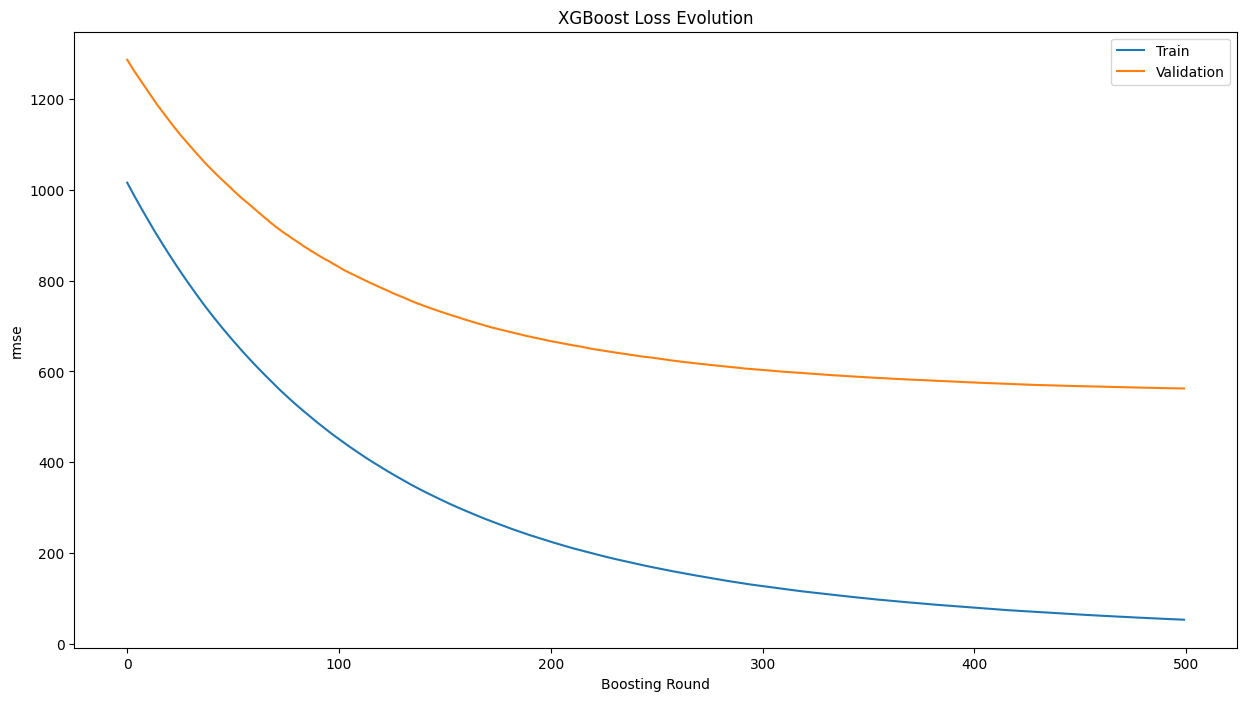

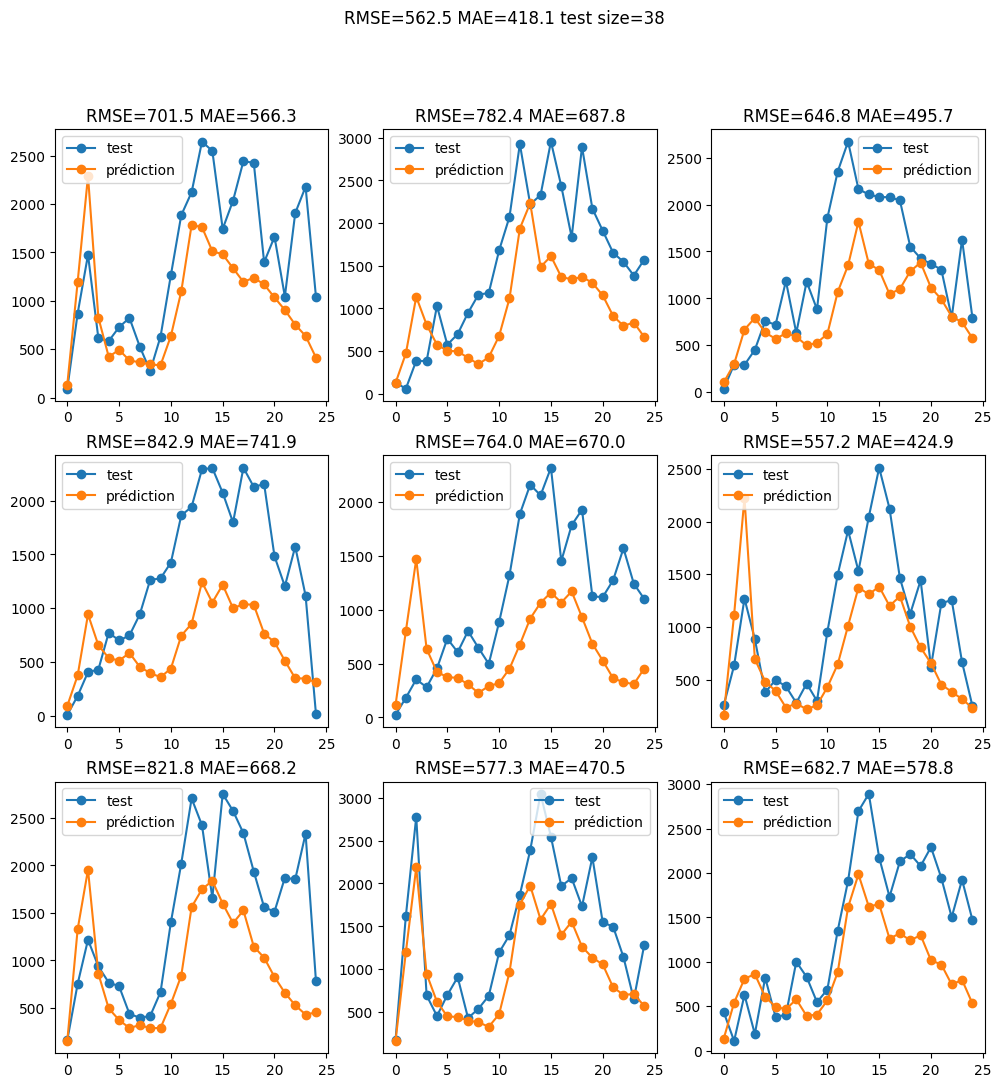

file saved at /Users/carlos/PycharmProjects/dionysos/prevision/results/Xgboost/saves/Xgboost_28.pkl
Training time:  0:00:13.409554


In [3]:
options = Options(model_type=XGBOOST_TYPE, input_sequence_length=14,
        output_sequence_length=1 if recursif or hourly else 7, verbose_mod=100, input_size=27,
        output_size=25 if hourly else 1,verbose=0,recursif=recursif,hourly=hourly)

modelWrapper = Model(options)
data = DataLoader(options)

if Tune_the_model :
    modelWrapper.fineTuneXGBoostRay(data, None, 100)
else :
    modelWrapper.train(data,1,1)


## Feature importance

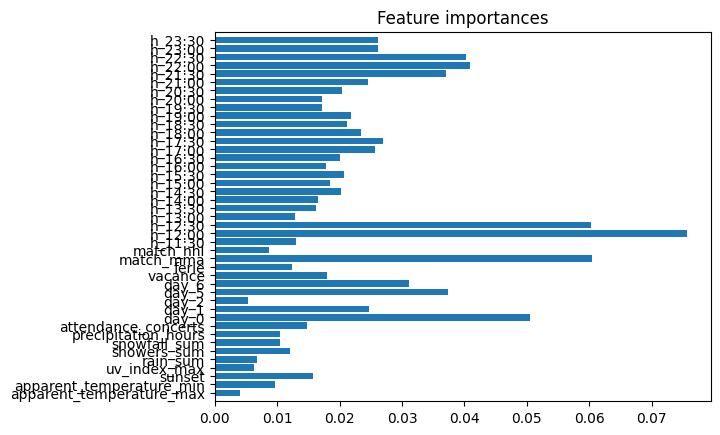

In [4]:
scores,names = modelWrapper.featureImportance(data.getFeatureNames())

## Déploiement
la fonction model.deploy(dataloader,plot=False) permet de lancer une prédiction du model sur tout le dataset envoyé en paramètre. Il faut juste s'assurer que les options paramétrés sont les mêmes. La fonction renvoie un dictionnaire comme tel :

    {'model':model,
    'predicted_sequence':predicted_sequence,
    'unflattenX':unflattenX,
    'X':X}

Il est possible d'envoyer vos propres données au dataLoader (sous forme de dataFrame).

In [5]:
dfX,dfY = data.getDF()

dfX = dfX.tail(50)
dfY = dfY.tail(30)

options.fullTraining=True
newData = DataLoader(options,customData=(dfX,dfY))

Data set in :  0:00:00.000329


In [6]:
modelWrapper.deploy(newData)

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'predicted_sequence': array([[ 163.84465 ,  599.0262  ,  989.43506 ,  966.2964  ,  717.0958  ,
          457.43872 ,  516.7008  ,  466.7682  ,  415.7683  ,  491.00034 ,
          712.7596  , 1153.0199  , 1940.8722  , 2163.3105  , 1536.723